In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [152]:
# #creating a dataset corresponding to the function y = x1 + x2
# y = [3]    
# s = 3
# d = 4
# for i in range (1,500):
#     s+=d
#     y.append(s)
# y += np.random.rand(len(y))    #adding random noise
# X = []    #the input matrix
# for i in range(1,1001):
#     X.append(i)
# # X = np.array(X)
# # X_min = X.min()
# # X_max = X.max()
# # X = (X - X_min) / (X_max - X_min)
# y = np.array(y)
# X = np.array(X).reshape(y.size,2)
# X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.25, shuffle=True)
# X = np.hstack( ((np.ones((X.shape[0],1))),X) )
# w = np.zeros((X.shape[1]))
# epochs = 500
# alpha = 0.1
# features = X.shape[1]
# samples = X.shape[0]
# print(X.shape)
# print(X[0])

(500, 3)
[1. 1. 2.]


In [153]:
# for epoch_counter in range (0,epochs):
#     for sample_counter in range(0,samples):
#         output = np.dot(X[sample_counter],w)-y[sample_counter]
#         for feature_counter in range(0,features):
#             derivative = output*X[sample_counter][feature_counter]
#             w[feature_counter]-=derivative*alpha
#         print(w)

In [103]:
df = pd.read_csv('synthetic_dataset.csv')
df = df.set_index('Unnamed: 0')
# sns.pairplot(df)
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)

In [139]:
class Model:
    y = []
    X = []
    w = []
    X_min = []
    X_max = []
    epochs = 0
    alpha = 0.001
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.X_min = np.zeros(self.X.shape[1])
        self.X_max = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
        for column in range(0,self.X.shape[1]):
            for row in range(self.X.shape[0]):
                if(self.X[row][column]>self.X_max[column]):
                    self.X_max[column] = self.X[row][column]
                if(self.X[row][column]<self.X_min[column]):
                    self.X_min[column] = self.X[row][column]
        self.normalize()
        
    def normalize(self):
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[1]):
                self.X[i][j] = (self.X[i][j]-self.X_min[j])/(self.X_max[j]-self.X_min[j])
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        for i in range(X_test1.shape[0]):
            for j in range(X_test1.shape[1]):
                X_test1[i][j] = (X_test1[i][j]-self.X_min[j])/(self.X_max[j]-self.X_min[j])
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)

In [140]:
myModel = Model(X_train,y_train,500)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)

LinearRegression()

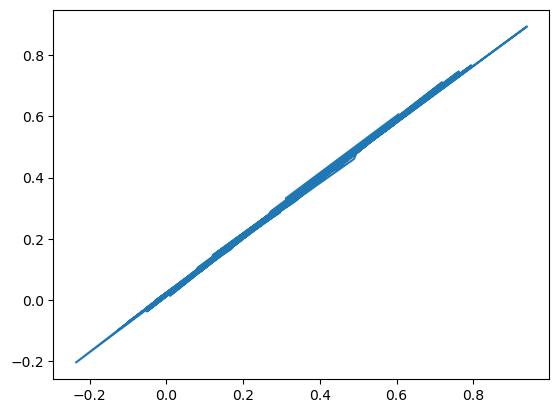

In [141]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)

In [131]:
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

sklearn: 0.41461568611102445 myModel: 0.4168838639754644


In [132]:
type(myPredictions)

numpy.ndarray

In [124]:
type(predictions)

numpy.ndarray

In [125]:
def sigmoid(x):
    return round(1/(1 + np.exp(-x)))
# myPredictions = myPredictions.apply(sigmoid)
# predictions = predictions.apply(sigmoid)
# predictions.
# print(classification_report(y_test, predictions))

In [126]:
vectorized_sigmoid = np.vectorize(sigmoid)

In [127]:
predictions = vectorized_sigmoid(predictions)
myPredictions = vectorized_sigmoid(myPredictions)
pre = vectorized_sigmoid(y_test)
print(predictions)
print(myPredictions)
print(pre)
# print(classification_report(y_test, predictions))
# print("\n")
# print(classification_report(y_test,myPredictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1]
[0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1]


In [128]:
round(0.2)

0

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        99
           1       0.36      1.00      0.53        51

    accuracy                           0.40       150
   macro avg       0.68      0.55      0.35       150
weighted avg       0.78      0.40      0.29       150



In [118]:
print(classification_report(y_test, myPredictions))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        99
           1       0.36      1.00      0.53        51

    accuracy                           0.39       150
   macro avg       0.68      0.54      0.34       150
weighted avg       0.78      0.39      0.28       150

